# Task 4.9 Part 2

### This script contains the following points:
#### 01. Import customer_merged dataframe
#### 02. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
#### 03. Create a histogram of the “order_hour_of_day” column.
#### 04. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
#### 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
#### 06. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
#### 07. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### 08. Export your visualizations as “.png” files in your relevant project folder.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 01. Import customer_merged dataframe

In [2]:
# Create Path
path = r'/Users/schitchards/Documents/Data Analytics/Programming/Instacart Basket Analysis'

In [3]:
# Import dataframe
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customer_merged.pkl'))

In [4]:
# Check output
df.shape

(32404859, 33)

In [5]:
#Check columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'active', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spending_flag', 'median_days_since_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income'],
      dtype='object')

### 02. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [6]:
# Change numeric display
pd.set_option('display.float_format', lambda x: '%.5f' % x)


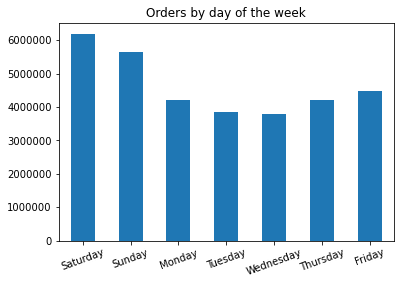

In [6]:
# Bar chart 
bar_orders_dow=df['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Orders by day of the week')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2,3,4,5,6], ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'],rotation=20) # Set text labels and properties.
plt.xlabel('')
bar_orders_dow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

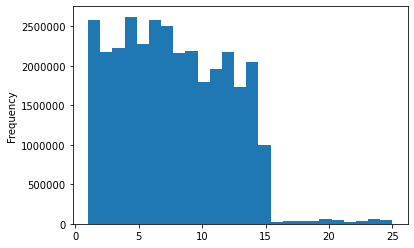

In [8]:
# Histogram
df['prices'].plot.hist(bins=25)
plt.ticklabel_format(style='plain', axis='y')

<AxesSubplot:xlabel='prices', ylabel='prices'>

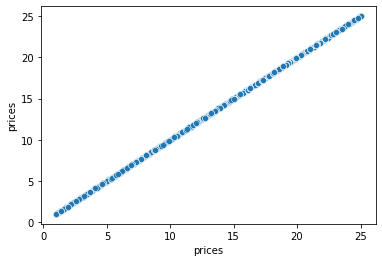

In [9]:
#Scatterplot
sns.scatterplot(x= 'prices', y= 'prices', data = df)

In [10]:
# Create a Line chart
#create sample of data
np.random.seed(4)

In [11]:
# Create a list holding True/False values to the test np.random.rant() <=0.7
dev = np.random.rand(len(df)) <= 0.7 

In [12]:
# New list of dev gives an output of True or False for every value based on whether it's less than or equal to 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [14]:
# Store 30% of the sample data in the dataframe small
small = df[~dev]

In [15]:
# Check number of rows for original data
len(df)

32404859

In [16]:
# Check total of new dataframes big and small to make sure they match org.
len(big) + len(small)

32404859

In [17]:
# Reduce sample to only necessary columns to speed up processing
df_2 = small[['orders_day_of_week','prices']]

Text(0.5, 0, '')

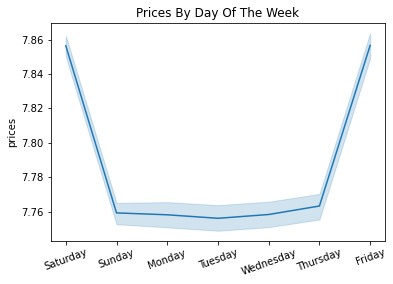

In [18]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')
plt.title('Prices By Day Of The Week')
plt.xticks([0, 1, 2,3,4,5,6], ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'],rotation=20) # Set text labels and properties.
plt.xlabel('')

### 03. Create a histogram of the “order_hour_of_day” column.

([<matplotlib.axis.XTick at 0x7f76c352c970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

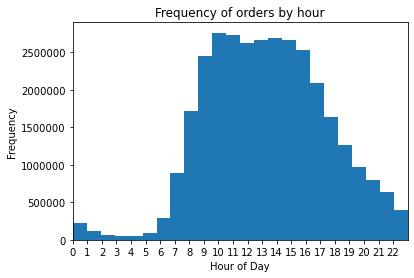

In [19]:
# Descriptive findings about sales using a histogram.
hist_order_hour = df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Frequency of orders by hour')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xlim(0, 23)
plt.xticks(np.arange(0, 23, step=1))  # Set label locations.

The histogram shows that the peak ordering hours are between 10am and 4pm which are roughly 2.5 times more than the slowest hours which fall between 1am and 5am.

### 04. Create a bar chart from the “loyalty_flag” column.

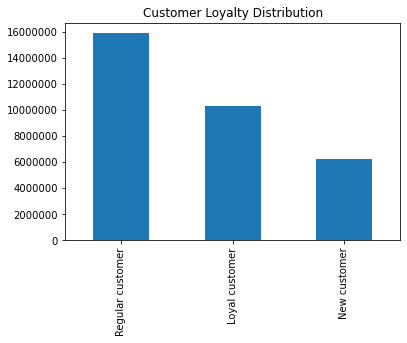

In [20]:
#Bar chart for loyalty_flag
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()
plt.title('Customer Loyalty Distribution')
plt.ticklabel_format(style='plain', axis='y')

### 05. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [21]:
# Set the seed
np.random.seed(4)

In [22]:
# Create new list
dev_prices = np.random.rand(len(df)) <=0.7

In [23]:
# Split list into two dataframes
big_prices = df[dev_prices]
small_prices = df[~dev_prices]

In [24]:
# Check if split correctly
len(df)

32404859

In [25]:
# Check new list dataframes
len(big_prices) + len(small_prices)

32404859

In [26]:
# Create reduced sample to only necessary columns order hour of day and prices 
df_prices_hour = small_prices[['order_hour_of_day','prices']]

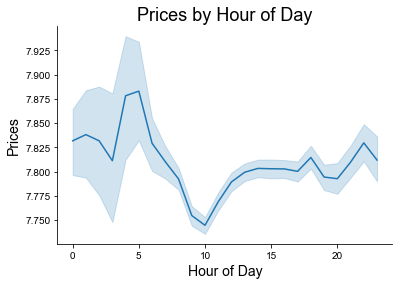

In [27]:
line_prices = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Hour of Day',size=14)
plt.ylabel('Prices', size=14)
plt.title('Prices by Hour of Day', size=18)
sns.despine()
sns.set(style='whitegrid')


There is a difference in expenditure depending on the hour of day

### 06. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [28]:
# Set the seed
np.random.seed(4)

In [29]:
# Create new list
dev_age_fam = np.random.rand(len(df)) <=0.7

In [30]:
# Split list into small and big dataframes
big_age = df[dev_age_fam]
small_age = df[~dev_age_fam]

In [31]:
# Check split
len(big_age) + len(small_age)

32404859

In [32]:
#Create reduced sample to only necessary columns age and number of dependants
df_age_family = small_age[['age','number_of_dependants']]

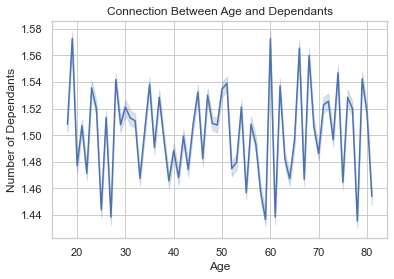

In [33]:
# Create linechart for age and number of dependants
line_age = sns.lineplot(data = df_age_family, x = 'age', y = 'number_of_dependants')
plt.title('Connection Between Age and Dependants')
plt.ylabel('Number of Dependants')
plt.xlabel('Age')
plt.ticklabel_format(style='plain', axis='y')

The linechart shows that there is no connection between age (x-axis) and number of dependants (y-axis). The range in number of dependants is also very small starting at 1.44 and going up to 1.58.

### 07. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

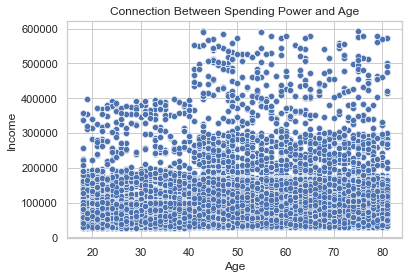

IOStream.flush timed out


In [34]:
# Create scatterplot
scatter_age_income=sns.scatterplot(x = 'age', y = 'income', data = df)
plt.title('Connection Between Spending Power and Age')
plt.ylabel('Income')
plt.xlabel('Age')
plt.ticklabel_format(style='plain', axis='y')

The scatterplot shows that there is a relationship between age( x-axis) and income (y-axis), as customers increase in age so does their spending power. As customers reach age 40 the max income increases from roughly 400,000 to 600,000 and the median income also increases by roughly 100,000 to 300,000.

### 08. Export your visualizations as “.png” files in your relevant project folder.

In [5]:
# Save histogram order hour of day
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_order_hour.png'))

NameError: name 'hist_order_hour' is not defined

In [36]:
# Save bar graph for loyaly flag
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_loyalty_flag.png'))

In [37]:
# Save prices vs hour of day line graph
line_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_prices_per_hour.png'))

In [38]:
line_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_age_dependants.png'))

In [39]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter_age_income.png'))